<a href="https://colab.research.google.com/github/srinathvenkatesen/CODSOFT/blob/main/_Srinath_MovieRatingPrediction_Codsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from collections import namedtuple

from IPython.display import display
import warnings

warnings.filterwarnings('ignore')


**Data Understanding**

**Data Collection**

In [ ]:
data = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin 1')

**Exploratory Data Analysis**

In [ ]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
data.sample(10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12088,Saaligirah,(1959),NaN,Romance,NaN,NaN,NaN,NaN,NaN,NaN
11504,Rahul,(1964),NaN,NaN,NaN,NaN,Ram Narayan Gabale,Chaman Puri,Ratnamala,Achala Sachdev
3355,Daku Bijlee,(1986),NaN,Action,NaN,NaN,Puneet Issar,Shakti Kapoor,Kader Khan,Kaajal Kiran
4513,Ek Shola,(1956),NaN,"Comedy, Drama, Romance",4.4,9,Chander Saigal,Pradeep Kumar,Mala Sinha,Shubha Khote
3091,Chor Bazar,(1954),127 min,"Action, Drama",6.1,24,Prem Narayan Arora,Shammi Kapoor,Sumitra Devi,Chitra
7245,Kamlabai,(1992),46 min,Documentary,7.6,8,Reena Mohan,Kamlabai Gokhale,NaN,NaN
9532,Mr Lele,NaN,NaN,Comedy,NaN,NaN,Shashank Khaitan,Asif Basra,Kiara Advani,Bhumi Pednekar
6111,Insaan Aur Haiwan,(1978),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
3291,Daasi,(2002),NaN,Drama,NaN,NaN,NaN,NaN,NaN,NaN
8580,Maharaja,(1970),NaN,Action,5.6,8,Naresh Saigal,Sanjay Khan,Nutan,Jeevan


In [ ]:
data.tail()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
# number of rows and columns
data.shape

(15509, 10)

denotes 15509 = Rows and 10 = Columns

In [ ]:
# dtypes
data.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [ ]:
# checking null values
data.info

<bound method DataFrame.info of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes

In [ ]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
data = data.dropna(subset=["Name"])

In [ ]:
data["Genre"].value_counts()

Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: Genre, Length: 485, dtype: int64

In [ ]:
data["Director"].value_counts()

Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: Director, Length: 5938, dtype: int64

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
# cleared all missing values

In [ ]:
#altering columns
data['Year'] = data['Year'].astype(str).str.replace('-', '')
data['Year'] = data['Year'].str.replace(r'\([^)]*\)', '')
data["Duration"] = data["Duration"].str.replace("min", " ")


In [ ]:
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

In [ ]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),NaN,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,NaN,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,NaN,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,NaN,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,NaN,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
data['Duration'] = data['Duration'].astype(int)
data['Votes'] = data['Votes'].astype(str)
data['Votes'] = data['Votes'].str.replace(',', '', regex=True).astype(int)

In [ ]:
data.dtypes

Name         object
Duration      int64
Genre        object
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [ ]:
data.head()

,Name,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


<function matplotlib.pyplot.show(close=None, block=None)>

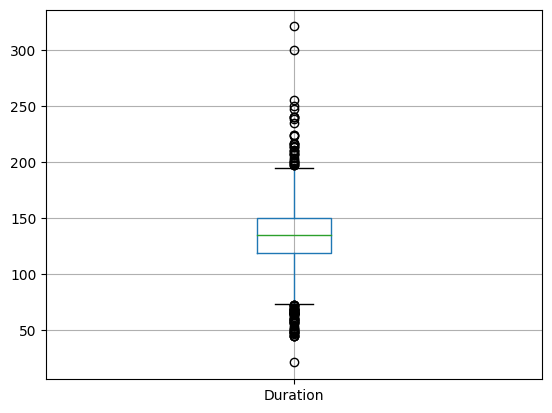

In [ ]:
#Removing outliers
data.boxplot(column="Duration")
plt.show

In [ ]:
def remove_outlier(col):
  sorted(col)
  q1,q3 = col.quantile([0.25,0.75])
  IQR = q3-q1
  lwr_bound=q1-(1.5*IQR)
  upr_bound=q3+(1.5*IQR)
  return lwr_bound,upr_bound


<Axes: >

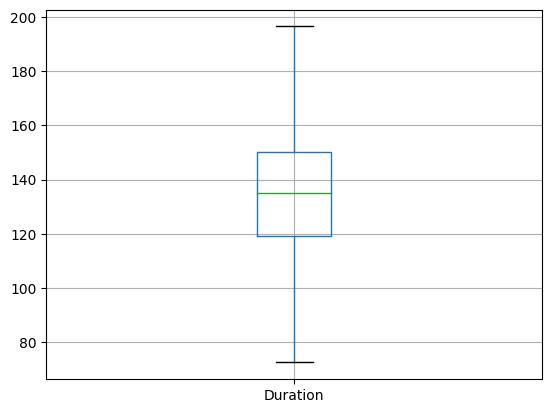

In [ ]:
low,high = remove_outlier(data['Duration'])
data['Duration']=np.where(data['Duration']>high,high,data['Duration'])
data['Duration']=np.where(data["Duration"]<low,low,data["Duration"])
data.boxplot(column='Duration')

<Axes: >

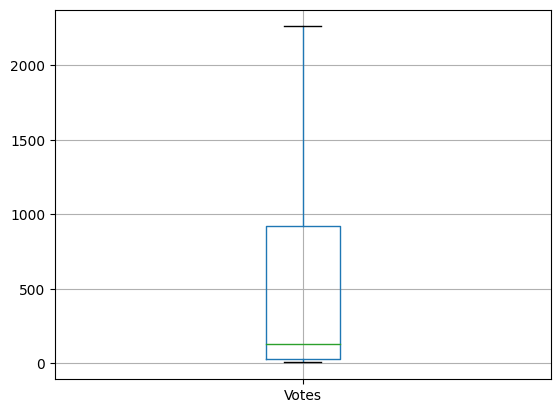

In [ ]:
low,high = remove_outlier(data['Votes'])
data['Votes']=np.where(data['Votes']>high,high,data['Votes'])
data['Votes']=np.where(data["Votes"]<low,low,data["Votes"])
data.boxplot(column='Votes')


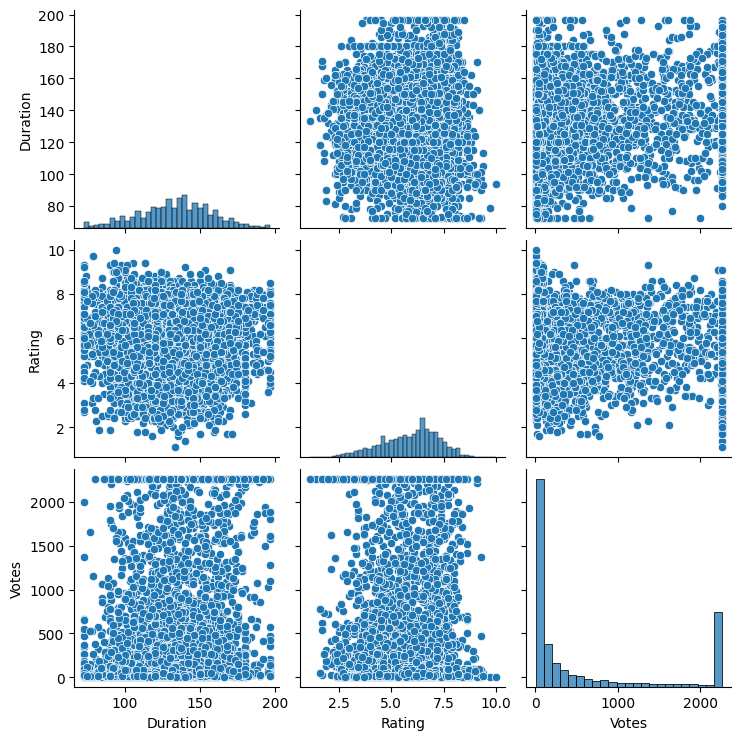

In [ ]:
sns.pairplot(data)
plt.show()

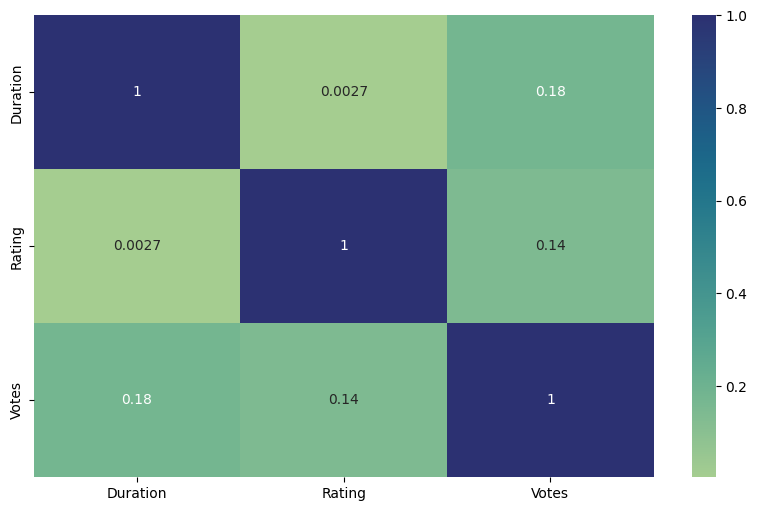

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), cmap = 'crest', annot = True)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
data["Genre"] = lb.fit_transform(data["Genre"])
data["Director"] = lb.fit_transform(data["Director"])
data["Actor 1"] = lb.fit_transform(data["Actor 1"])
data["Actor 2"] = lb.fit_transform(data["Actor 2"])
data["Actor 3"] = lb.fit_transform(data["Actor 3"])

In [ ]:
x = data.drop("Name", axis = 1)
y = data["Rating"]

In [ ]:
print(x)
print(y)


       Duration  Genre  Rating   Votes  Director  Actor 1  Actor 2  Actor 3
1         109.0    229     7.0     8.0       629     1352     2272      319
3         110.0    184     4.4    35.0      1335     1198      719     2148
5         147.0    157     4.7   827.0      1530      378       75     2045
6         142.0    289     7.4  1086.0      2044      692     1112     2524
8          82.0    320     5.6   326.0       135     1934     1175     1013
...         ...    ...     ...     ...       ...      ...      ...      ...
15493     115.0    229     6.1   408.0      1223     1861     1801     1615
15494     153.0    133     6.2  1496.0      2059      763     1619     1184
15503     125.0     28     5.8    44.0      1793      406      754     1685
15505     129.0     38     4.5   655.0      1025      112     2164      314
15508     130.0     38     6.2    20.0       895      468      753      303

[5659 rows x 8 columns]
1        7.0
3        4.4
5        4.7
6        7.4
8        5.

In [ ]:
x.describe()

,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000
mean,133.421099,171.728221,5.898533,616.125022,1211.864994,966.963598,1182.761442,1276.103375
std,24.309447,108.208770,1.381165,843.271672,686.698545,564.890824,666.834013,720.046925
min,72.500000,0.000000,1.100000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,119.000000,47.000000,5.000000,30.000000,637.000000,468.000000,617.000000,652.500000
50%,135.000000,184.000000,6.100000,131.000000,1198.000000,971.000000,1198.000000,1306.000000
75%,150.000000,248.000000,6.900000,922.500000,1793.000000,1472.000000,1767.500000,1868.500000
max,196.500000,375.000000,10.000000,2261.250000,2430.000000,1959.000000,2320.000000,2555.000000


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print("Model: ", model_name)
    print("Accuracy = {:0.2f}%".format(score(y_true, y_pred)*100))
    print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_true, y_pred, squared=False)))
    return round(score(y_true, y_pred)*100, 2)

In [ ]:
LR = LinearRegression()
LR.fit(x_train, y_train)
lr_preds = LR.predict(x_test)

RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(x_train, y_train)
rf_preds = RFR.predict(x_test)

DTR = DecisionTreeRegressor(random_state=1)
DTR.fit(x_train, y_train)
dt_preds = DTR.predict(x_test)

GBR = GradientBoostingRegressor(n_estimators=100, random_state=60)
GBR.fit(x_train, y_train)
gb_preds = GBR.predict(x_test)

KNR = KNeighborsRegressor(n_neighbors=5)
KNR.fit(x_train, y_train)
knn_preds = KNR.predict(x_test)

In [ ]:
LRScore = evaluate_model(y_test, lr_preds, "LINEAR REGRESSION")
RFScore = evaluate_model(y_test, rf_preds, "RANDOM FOREST")
DTScore = evaluate_model(y_test, dt_preds, "DECEISION TREE")
GBScore = evaluate_model(y_test, gb_preds, "GRADIENT BOOSTING")
KNNScore = evaluate_model(y_test, knn_preds, "K NEAREST NEIGHBORS")

Model:  LINEAR REGRESSION
Accuracy = 100.00%
Mean Squared Error = 0.00

Model:  RANDOM FOREST
Accuracy = 100.00%
Mean Squared Error = 0.00

Model:  DECEISION TREE
Accuracy = 100.00%
Mean Squared Error = 0.00

Model:  GRADIENT BOOSTING
Accuracy = 100.00%
Mean Squared Error = 0.00

Model:  K NEAREST NEIGHBORS
Accuracy = -11.00%
Mean Squared Error = 1.43



In [ ]:
models = pd.DataFrame(
    {
        "MODELS": ["Linear Regression", "Random Forest", "Decision Tree", "Gradient Boosting","K Nearest Neighbors"],
        "SCORES": [LRScore, RFScore, DTScore, GBScore, KNNScore]
    }
)
models.sort_values(by='SCORES', ascending=False)

,MODELS,SCORES
0,Linear Regression,100.00
1,Random Forest,100.00
2,Decision Tree,100.00
3,Gradient Boosting,100.00
4,K Nearest Neighbors,94.75


**Insights**

1. Duration affects the Rating of the movies.

2. 2021 was the year with Best Rating.

3. **1971 , 3 Idiots** ,**A Billion Colour Story**,**A Gift of Love,Sifar** ,**A Wednesday** was the overall top 5 rated movies.
